<a href="https://colab.research.google.com/github/sagarpuniyani/Deep-learning/blob/master/recode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
path_df = "/content/drive/MyDrive/research work /01_Steps.csv"
df = pd.read_csv(path_df)
df

,date,steps,distance,runDistance,calories
0,2016-04-27,4948,3242,46,281
1,2016-04-28,16573,12060,79,751
2,2016-04-29,18002,12916,29,737
3,2016-04-30,4126,2981,11,207
4,2016-05-01,3869,2651,0,244
...,...,...,...,...,...
2449,2023-01-10,4451,2919,2495,198
2450,2023-01-11,11750,9207,7066,523
2451,2023-01-12,11623,8484,6506,360
2452,2023-01-13,4508,3169,2578,193


In [14]:
from sklearn.model_selection import train_test_split

x= df.iloc[:,1:4].values
y=df[['calories']]

x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

Text(0.5, 1.0, 'Steps')

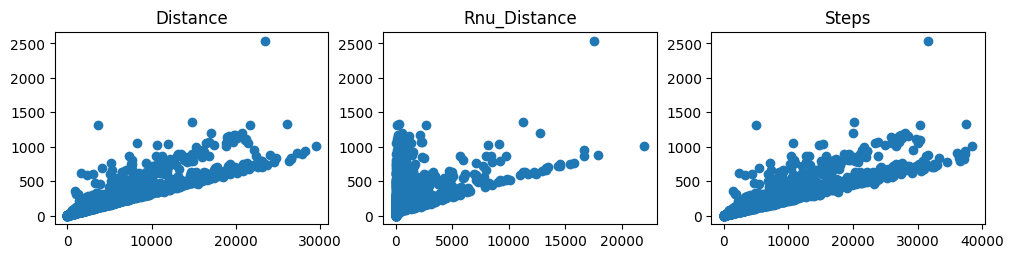

In [16]:
fig, (ax1 , ax2 , ax3 ) = plt.subplots( ncols=3 , figsize= (12, 2.5))

ax1.scatter(df['distance'] , df['calories'])
ax1.set_title("Distance")

ax2.scatter(df['runDistance'] , df['calories'])
ax2.set_title("Rnu_Distance")

ax3.scatter(df['steps']  , df['calories'])
ax3.set_title("Steps")


In [21]:
! pip intall statsmodels


ERROR: unknown command "intall" - maybe you meant "install"


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = []

for i in range(x_train.shape[1]):
  vif.append(variance_inflation_factor( x_train , i))

In [28]:
pd.DataFrame({'Vif' : vif } , index=df.columns[1:4]).T

,steps,distance,runDistance
Vif,599.129908,607.914156,1.477119


<Axes: >

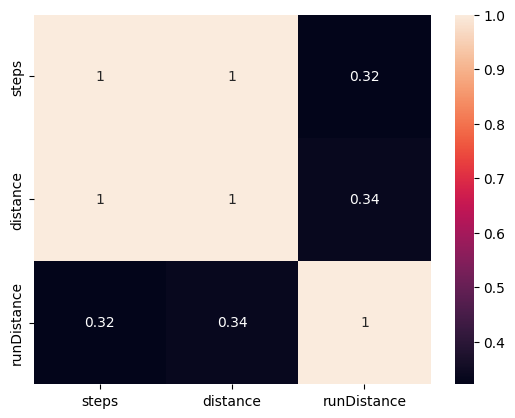

In [29]:
sns.heatmap(df.iloc[:,1:4].corr() , annot = True)

In [30]:
#residuals
y_pred = model.predict(x_test)
residual = y_test - y_pred

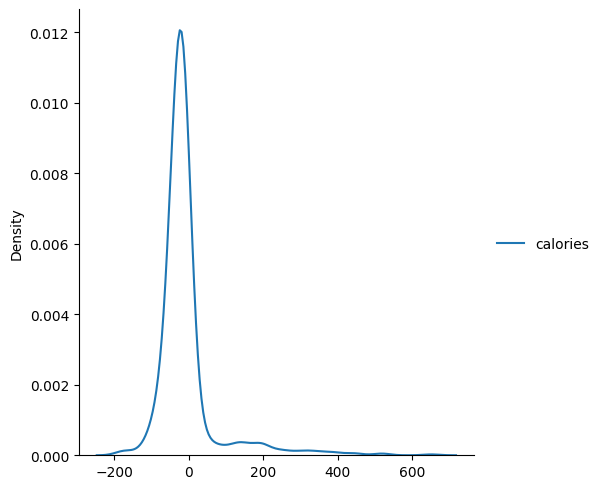

In [31]:
# residual plot on KDE 
sns.displot(residual , kind = 'kde')

ValueError: ignored

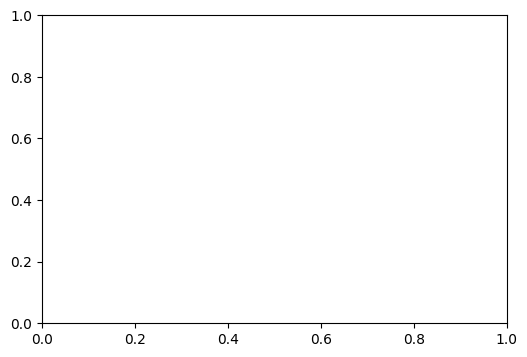

In [35]:
# QQ plot 

import scipy as sp 

fig , zx = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual , plot=zx , fit=True )


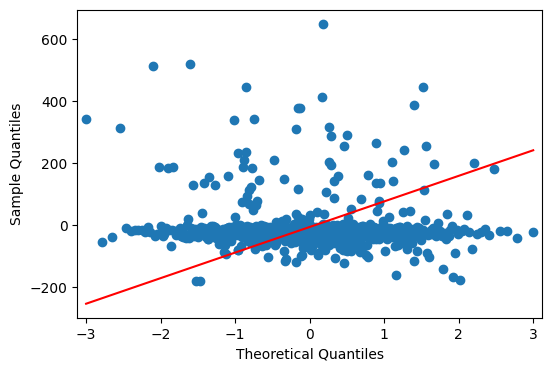

In [36]:
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg
import matplotlib.pyplot as plt

# Assuming you have the 'residual' variable containing your data

fig, ax = plt.subplots(figsize=(6, 4))
smg.qqplot(residual, line='s', ax=ax)

plt.show()


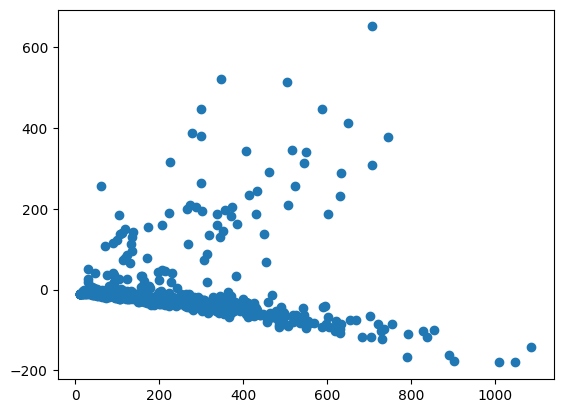

In [38]:
# Homoscedasticity
plt.scatter(y_pred , residual)

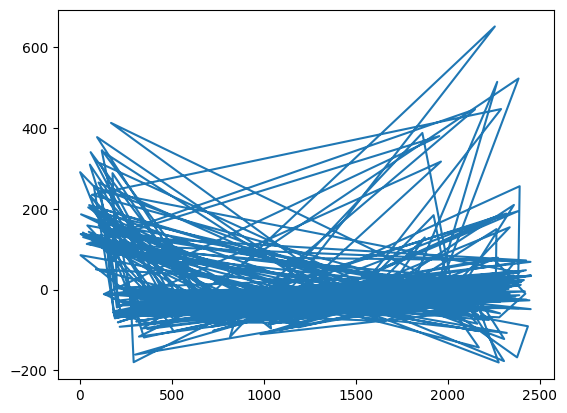

In [39]:
# Auto correlation of the Residual 
plt.plot(residual)